### Задание 0
Найдите минимально необходимый объем выборки для построения интервальной оценки среднего. Желаемая точность  Δ  = 3; дисперсия  𝜎2  = 225; уровень доверия  𝛽  = 0.95.

In [55]:
import numpy as np, pandas as pd, scipy.stats as stats, matplotlib.pyplot as plt
from pylab import rcParams

sigma = 15
Z = 1.96
Delta = 3
N = ((sigma*Z)/Delta)**2
N

96.03999999999998

### Задание 1
Постройте 98% доверительный интервал для среднего значения, если известно, что объем выборки n = 25; среднее значение по выборке  𝑥⎯⎯⎯  = 130. Из достоверных источников известно стандартное отклонение  𝜎=12 .

In [2]:
conf_int = stats.norm.interval(0.98, 130, 12 / np.sqrt(25))
conf_int

(124.41676510230198, 135.58323489769802)

### Задание 2
Даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различие между выборками незначительно, если уровень значимости равен 𝛼  = 0.001. Покажите различия визуально

In [111]:
population_men  = stats.norm.rvs(loc=19, scale=171, size=1100000)  
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)

t,p  = stats.ttest_ind(population_men, population_women)
print("t = " + str(t))
print("p = " + str(p))

t = 1.4081446986495185
p = 0.1590885071659426


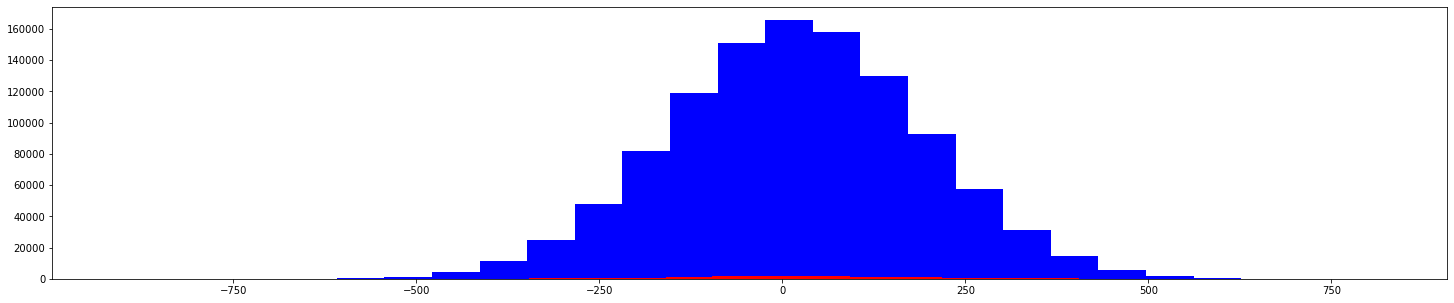

In [112]:
plt.hist(population_men, bins=25, color='blue'); 
plt.hist(population_women, bins=25, color='red');
rcParams['figure.figsize'] = 25,5

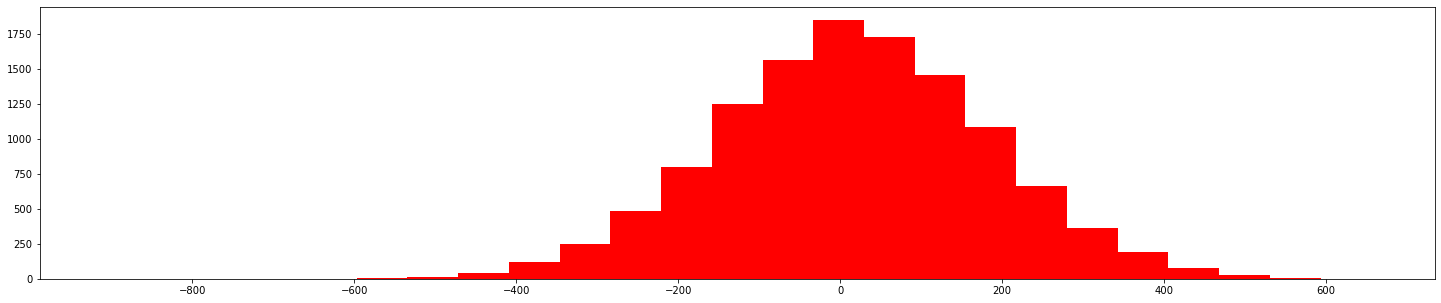

In [113]:
plt.hist(population_women, bins=25, color='red');

Несмотря на почти стократное различие в количестве элементов, выборки близки друг к другу по характеру распределения. Повторные итерации показали, что почти во всех случаях p-value был выше уровня значимости, а следовательно, сила нулевой гипотезы (выборки схожи) высока.  

### Задание 3
Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе: стандартное отклонение  𝜎=150; уровень доверия  𝛽  = 95%; погрешность  Δ=50  рублей.

In [6]:
sigma = 150
Z = 1.96
Delta = 50
N = ((sigma*Z)/Delta)**2
N

34.5744

### Задание 4
Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за 0.05 ( 𝛼=0.05 ).

In [7]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
oddsratio, pvalue = stats.fisher_exact(observations)
oddsratio, pvalue

(0.5811965811965812, 0.35417955365927367)

Высокий показатель p-value (35,4%), кратно превышающий уровень значимости (5%), говорит не в пользу способностей мага предсказывать погоду. На этом основании мы не можем отвергнуть нулевую гипотезу о том, что совпадения случайны. Она выглядит правдопобоной.  

### Задание 5
Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия  𝛽=90%  для выборки:

In [98]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

def mean_confidence_interval(data, confidence=0.9):   
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)
    return m-h, m, m+h 

print(mean_confidence_interval(data))

(6.074074746111319, 6.628571428571429, 7.183068111031539)


### Задание 6
Принадлежат ли выборки data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов для проверок статистических гипотез. Покажите различия визуально.

In [8]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

t, p = stats.ttest_ind(data_1, data_2)
t, p

(7.35744682757447, 2.1159475572725764e-11)

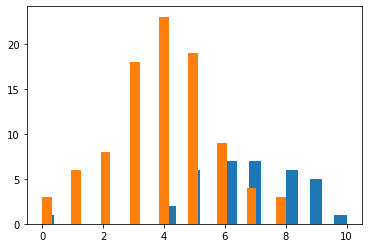

In [106]:
plt.hist(data_1, bins=25);
plt.hist(data_2, bins=25);

И крайне низкое Р-значение, и график показывают, что это два разных множества.

### Задание 7
На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.

Предположим, Вы сформировали две гипотезы:
нулевая гипотеза - распределение нормальное;
альтернативная гипотеза - распределение ненормальное.
допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости p-value = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)

#### Ответ
Чем меньше значение p-value, тем большую силу имеет альтернативная гипотеза. Если принять уровень значимости в 5%, то можно сказать, что высока вероятность ненормального распределения.  

### Задание 8
Первая выборка — это пациенты, которых лечили препаратом А. Вторая выборка — пациенты, которых лечили препаратом B.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)

Требуется выяснить, имеется ли значимое различие эффективности препаратов А и B, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики? (уровень значимости принять за 0.05 (5%))

При каком минимальном p-value различия были бы уже значимы?

Если выборки незначительно отличаются, то продемонстрируйте это визуально

In [117]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-7.5,size=300)

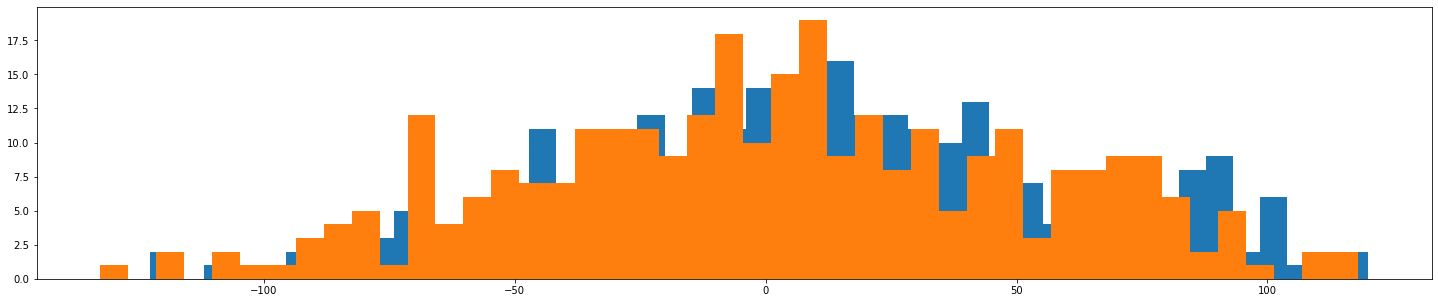

In [118]:
plt.hist(A, bins=45);
plt.hist(B, bins=45);

In [116]:
stats.ttest_ind(A,B,equal_var=False)

Ttest_indResult(statistic=1.8847229265385363, pvalue=0.05995260332765237)

Выборки отчасти отличны друг от друга, однако различия между ними не столь существенные, чтобы можно было уверенно говорить о том, что одно лекарство эффективнее другого. Кроме того, полученное p-value склоняет к выводу об отсутствии значимых отличий: оно перешагнуло порог уровня значимости в 5% (почти 6%).  